In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
test_df = pd.read_csv('./data/test.csv', parse_dates=["datetime"])
train_df = pd.read_csv('./data/train.csv', parse_dates=["datetime"])

In [8]:
all_df = pd.concat((train_df, test_df), axis=0, sort=True).reset_index()
all_df.head()

,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [9]:
all_df.tail()

,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
17374,6488,12.880,NaN,NaN,2012-12-31 19:00:00,0,60,NaN,1,10.66,2,11.0014,1
17375,6489,12.880,NaN,NaN,2012-12-31 20:00:00,0,60,NaN,1,10.66,2,11.0014,1
17376,6490,12.880,NaN,NaN,2012-12-31 21:00:00,0,60,NaN,1,10.66,1,11.0014,1
17377,6491,13.635,NaN,NaN,2012-12-31 22:00:00,0,56,NaN,1,10.66,1,8.9981,1
17378,6492,13.635,NaN,NaN,2012-12-31 23:00:00,0,65,NaN,1,10.66,1,8.9981,1


In [10]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df), len(all_df)))
train_index[-1], test_index[-1]

(10885, 17378)

In [14]:
len(test_df)

6493

In [15]:
all_df.isnull().sum()

index            0
atemp            0
casual        6493
count         6493
datetime         0
holiday          0
humidity         0
registered    6493
season           0
temp             0
weather          0
windspeed        0
workingday       0
dtype: int64

## Evaluation Metrics

In [16]:
x = np.array([np.inf, -np.inf, np.nan, -128, 128])
x

array([  inf,  -inf,   nan, -128.,  128.])

In [17]:
np.nan_to_num(x)

array([ 1.79769313e+308, -1.79769313e+308,  0.00000000e+000,
       -1.28000000e+002,  1.28000000e+002])

In [20]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y + 1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [22]:
submission_df = pd.read_csv("./data/sampleSubmission.csv")
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [23]:
rmsle(submission_df['count'].values,
      np.random.randint(0, 100, size=len(submission_df)))

3.7643455073416514

In [24]:
del all_df['casual']
del all_df['registered']
del all_df['index']
all_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0


In [25]:
pre_df = all_df.merge(pd.get_dummies(all_df["season"], prefix="season"), left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,season_2,season_3,season_4
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,1,0,0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0


In [27]:
pre_df = pre_df.merge(pd.get_dummies(all_df["weather"], prefix="weather"), left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0,1,0,0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0,1,0,0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0


In [30]:
pre_df["year"] = pre_df['datetime'].dt.year
pre_df["month"] = pre_df['datetime'].dt.month
pre_df["day"] = pre_df['datetime'].dt.day
pre_df["hour"] = pre_df['datetime'].dt.hour
pre_df["weekday"] = pre_df['datetime'].dt.weekday

In [31]:
pre_df = pre_df.merge(pd.get_dummies(pre_df['weekday'], prefix="weekday"), left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,...,1,0,5,0,0,0,0,0,1,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,...,1,1,5,0,0,0,0,0,1,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,...,1,2,5,0,0,0,0,0,1,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,...,1,3,5,0,0,0,0,0,1,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,...,1,4,5,0,0,0,0,0,1,0


In [34]:
pre_df.dtypes

atemp                float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
season                 int64
temp                 float64
weather                int64
windspeed            float64
workingday             int64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [35]:
pre_df['holiday'].unique()

array([0, 1], dtype=int64)

In [36]:
pre_df['workingday'].unique()

array([0, 1], dtype=int64)

In [37]:
category_variable_list = ["season", "season_1", "season_2", "season_3", "season_4",
                          "weather", "weather_1", "weather_2", "weather_3", "weather_4",
                          "weekday", "weekday_0", "weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5", "weekday_6",
                          "holiday", "workingday", "year", "month", "day", "hour"]
for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype("category")

In [38]:
pre_df.dtypes

atemp                float64
count                float64
datetime      datetime64[ns]
holiday             category
humidity               int64
season              category
temp                 float64
weather             category
windspeed            float64
workingday          category
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [40]:
# 가공된 train 데이터 뽑아내기
train_df = pre_df.iloc[train_index]
train_df.tail()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
10881,19.695,336.0,2012-12-19 19:00:00,0,50,4,15.58,1,26.0027,1,...,19,19,2,0,0,1,0,0,0,0
10882,17.425,241.0,2012-12-19 20:00:00,0,57,4,14.76,1,15.0013,1,...,19,20,2,0,0,1,0,0,0,0
10883,15.910,168.0,2012-12-19 21:00:00,0,61,4,13.94,1,15.0013,1,...,19,21,2,0,0,1,0,0,0,0
10884,17.425,129.0,2012-12-19 22:00:00,0,61,4,13.94,1,6.0032,1,...,19,22,2,0,0,1,0,0,0,0
10885,16.665,88.0,2012-12-19 23:00:00,0,66,4,13.12,1,8.9981,1,...,19,23,2,0,0,1,0,0,0,0


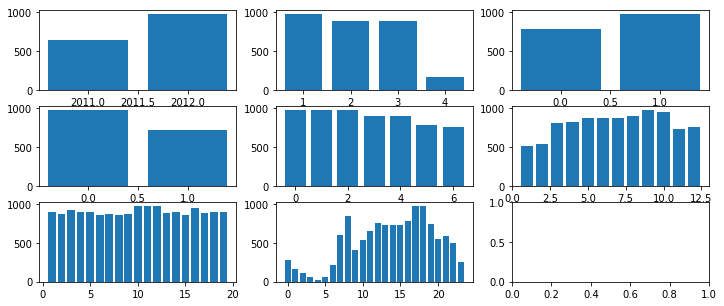

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(12, 5)
axes[0][0].bar(train_df["year"], train_df["count"])
axes[0][1].bar(train_df["weather"], train_df["count"])
axes[0][2].bar(train_df["workingday"], train_df["count"])
axes[1][0].bar(train_df["holiday"], train_df["count"])
axes[1][1].bar(train_df["weekday"], train_df["count"])
axes[1][2].bar(train_df["month"], train_df["count"])
axes[2][0].bar(train_df["day"], train_df["count"])
axes[2][1].bar(train_df["hour"], train_df["count"])
plt.show()

In [42]:
series_data = train_df.groupby(["month"])["count"].mean()
series_data

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

In [43]:
series_data.index.tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

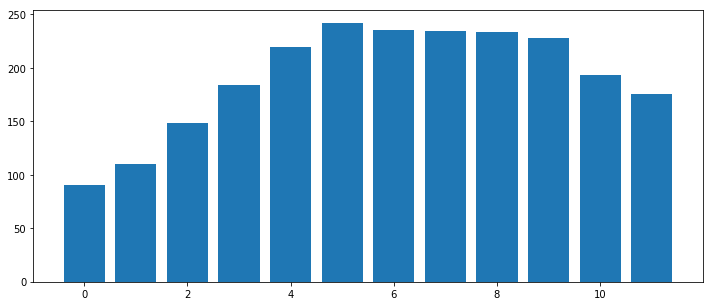

In [44]:
fig, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
fig.set_size_inches(12, 5)
plt.show()

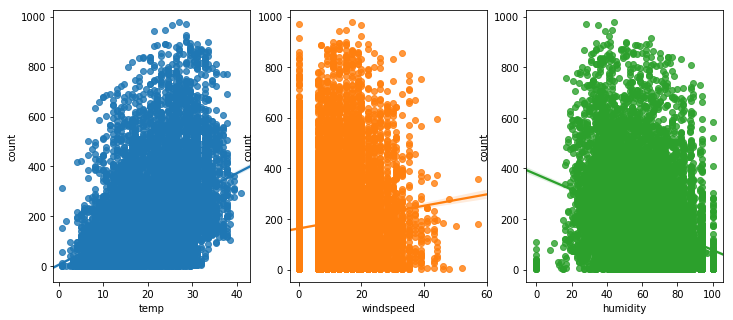

In [47]:
import seaborn as sn

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=train_df, ax=ax1)
sn.regplot(x="windspeed", y="count", data=train_df, ax=ax2)
sn.regplot(x="humidity", y="count", data=train_df, ax=ax3)
plt.show()

In [48]:
category_variable_list

['season',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'holiday',
 'workingday',
 'year',
 'month',
 'day',
 'hour']

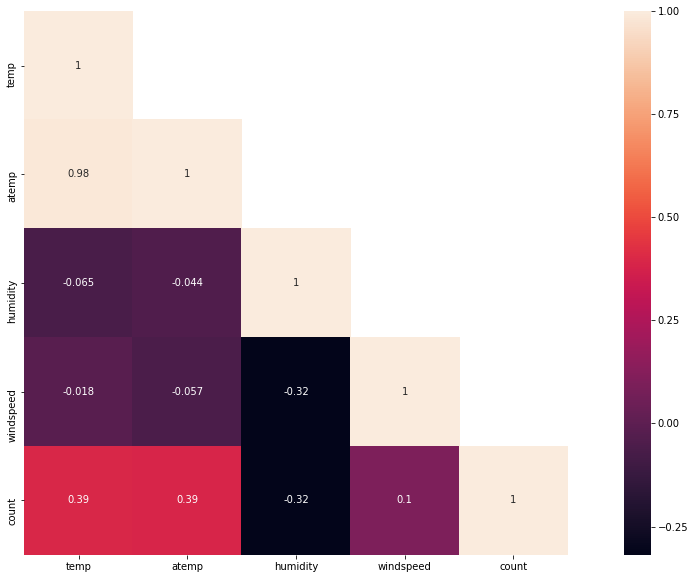

In [56]:
corrMatt = train_df[["temp", "atemp", "humidity", "windspeed", "count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask, square=True, annot=True)
plt.show()

In [61]:
continuous_variable_list = ["temp", "atemp", "humidity", "windspeed"]

In [62]:
season_list = ["season_1", "season_2", "season_3", "season_4"]
weather_list = ["weather_1", "weather_2", "weather_3", "weather_4"]
weekday_list = ["weekday_0", "weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5", "weekday_6"]

In [63]:
category_variable_list = ["season", "holiday", "workingday", "weather", "weekday", "month", "year", "hour"]

In [64]:
all_variable_list = continuous_variable_list + category_variable_list

In [65]:
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)

In [66]:
all_variable_list

['temp',
 'atemp',
 'humidity',
 'windspeed',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [67]:
number_of_variables = len(all_variable_list)
number_of_variables

15

In [95]:
variable_combinations = []
import itertools
for L in range(11, 12):
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset:
            if isinstance(variable, list):
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        variable_combinations.append(temp)
        
variable_combinations[0:5]

[['temp',
  'atemp',
  'humidity',
  'windspeed',
  'season',
  'holiday',
  'workingday',
  'weather',
  'weekday',
  'month',
  'year'],
 ['temp',
  'atemp',
  'humidity',
  'windspeed',
  'season',
  'holiday',
  'workingday',
  'weather',
  'weekday',
  'month',
  'hour'],
 ['temp',
  'atemp',
  'humidity',
  'windspeed',
  'season',
  'holiday',
  'workingday',
  'weather',
  'weekday',
  'month',
  'season_1',
  'season_2',
  'season_3',
  'season_4'],
 ['temp',
  'atemp',
  'humidity',
  'windspeed',
  'season',
  'holiday',
  'workingday',
  'weather',
  'weekday',
  'month',
  'weather_1',
  'weather_2',
  'weather_3',
  'weather_4'],
 ['temp',
  'atemp',
  'humidity',
  'windspeed',
  'season',
  'holiday',
  'workingday',
  'weather',
  'weekday',
  'month',
  'weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [96]:
len(variable_combinations)

1365

In [72]:
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,...,1,0,5,0,0,0,0,0,1,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,...,1,1,5,0,0,0,0,0,1,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,...,1,2,5,0,0,0,0,0,1,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,...,1,3,5,0,0,0,0,0,1,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,...,1,4,5,0,0,0,0,0,1,0


In [73]:
del pre_df['count']

In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime
import warnings
warnings.filterwarnings(action='once')

kf = KFold(n_splits=10)

y = train_df["count"].values
final_output = []
models = []

print(len(variable_combinations))
ts = datetime.datetime.now()

for i, combination in enumerate(variable_combinations):
    lr = LinearRegression(n_jobs=8)
    ridge = Ridge()
    lasso = Lasso()
    
    lr_result = []
    ridge_result = []
    lasso_result = []
    
    target_df = pre_df[combination]
    All = target_df.values
    std = StandardScaler()
    std.fit(All)
    All_scaled = std.transform(All)
    X = All_scaled[train_index]
    
    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index]
        
        lr.fit(X_train, y_train)
        result = rmsle(y_test, lr.predict(X_test))
        lr_result.append(result)
        
        ridge.fit(X_train, y_train)
        result = rmsle(y_test, ridge.predict(X_test))
        ridge_result.append(result)
        
        lasso.fit(X_train, y_train)
        result = rmsle(y_test, lasso.predict(X_test))
        lasso_result.append(result)
        
    final_output.append([i, np.mean(lr_result), np.mean(ridge_result), np.mean(lasso_result)])
    models.append([lr, ridge, lasso])
    
    if i % 100 == 0:
        tf = datetime.datetime.now()
        te = tf - ts
        print(i, te)
        ts = datetime.datetime.now()

1365


C:\Users\Daehun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Daehun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0 0:00:00.356253
100 0:00:56.758395
200 0:01:05.177388
300 0:01:05.317488
400 0:01:04.436861
500 0:01:05.530638
600 0:01:12.701742
700 0:01:14.271860
800 0:00:45.034061
900 0:00:46.101812
1000 0:00:53.204865
1100 0:00:39.708260
1200 0:00:39.684245
1300 0:00:51.985998


In [98]:
labels = ["combination", "lr", "ridge", "lasso"]

from pandas import DataFrame
result_df = DataFrame(final_output, columns=labels)
result_df.head()

,combination,lr,ridge,lasso
0,0,1.440172,1.440105,1.424768
1,1,1.311188,1.310947,1.300136
2,2,1.460847,1.460745,1.452281
3,3,1.461742,1.461562,1.449365
4,4,1.460521,1.464334,1.449512


In [99]:
result_df.min()

combination    0.000000
lr             1.275627
ridge          1.276693
lasso          1.260626
dtype: float64

In [100]:
result_df["lasso"].sort_values().head()

228     1.260626
144     1.279235
1019    1.279249
348     1.279529
53      1.279648
Name: lasso, dtype: float64

In [101]:
variable_combinations[228]

['temp',
 'atemp',
 'humidity',
 'windspeed',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'hour',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [102]:
target_df = pre_df[variable_combinations[228]]
ALL = target_df.values
std = StandardScaler()
std.fit(ALL)
ALL_scaled = std.transform(ALL)
X_submission_test = ALL_scaled[test_index]
X_submission_test.shape

C:\Users\Daehun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(6493, 20)

In [103]:
X_submission_test

array([[-1.23077877, -1.44592342, -0.34847267, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -1.18173227, -0.34847267, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -1.18173227, -0.34847267, ..., -0.40865929,
        -0.41105331, -0.41009641],
       ...,
       [-1.23077877, -1.26960201, -0.14113744, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -1.18173227, -0.34847267, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -1.18173227,  0.11803159, ..., -0.40865929,
        -0.41105331, -0.41009641]])

In [105]:
models[228][2]

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [106]:
final_result = models[228][2].predict(X_submission_test)
final_result[final_result < 0] = 0

In [107]:
final_result

array([ 22.96973148,  34.42480162,  41.79512688, ..., 170.3884875 ,
       187.50534509, 177.91942769])

In [108]:
pre_df.iloc[test_index]["datetime"].head()

10886   2011-01-20 00:00:00
10887   2011-01-20 01:00:00
10888   2011-01-20 02:00:00
10889   2011-01-20 03:00:00
10890   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]

In [109]:
data = {"datetime": pre_df.iloc[test_index]["datetime"], "count": final_result}
df_submission = DataFrame(data, columns=["datetime", "count"])
df_submission.head()

,datetime,count
10886,2011-01-20 00:00:00,22.969731
10887,2011-01-20 01:00:00,34.424802
10888,2011-01-20 02:00:00,41.795127
10889,2011-01-20 03:00:00,48.108490
10890,2011-01-20 04:00:00,55.478815


In [110]:
df_submission.set_index("datetime").to_csv("teamlab_submission_lasso.csv")